* Overview: Purpose of this notebook is to analyze the privacy test result on sample data. There are some findings being shared in this notebook.

In [1]:
# load json file into pandas dataframe
import pandas as pd
import json

json_data = open("../data/sample_data.json").read()
data = json.loads(json_data)
df = pd.DataFrame(data)
df.head()

,metadata,schema,genconfig,privacy,quality
0,"{'runtime_end': '2024-10-11T08:29:46.965707', ...","[{'name': 'repository_created_at', 'type': 'da...","{'type': 'SubsaltTVAE', 'epochs': '3000', 'lea...","[{'name': 'Minimum row count', 'threshold': 30...",[]
1,"{'runtime_end': '2024-10-11T08:29:47.403551', ...","[{'name': 'repository_created_at', 'type': 'da...","{'type': 'SubsaltTVAE', 'epochs': '3000', 'lea...","[{'name': 'Minimum row count', 'threshold': 30...",[]
2,"{'runtime_end': '2024-10-11T08:29:48.014113', ...","[{'name': 'repository_created_at', 'type': 'da...","{'type': 'SubsaltCopulaGAN', 'epochs': '3000',...","[{'name': 'Minimum row count', 'threshold': 30...",[]
3,"{'runtime_end': '2024-10-11T08:29:48.817046', ...","[{'name': 'repository_created_at', 'type': 'da...","{'type': 'SubsaltCopulaGAN', 'epochs': '3000',...","[{'name': 'Minimum row count', 'threshold': 30...",[]
4,"{'runtime_end': '2024-10-11T08:29:49.488118', ...","[{'name': 'repository_created_at', 'type': 'da...","{'type': 'SubsaltCTGAN', 'epochs': '3000', 'le...","[{'name': 'Minimum row count', 'threshold': 30...",[]


In [2]:
# expand column of dictionaries into separate columns
df = pd.concat(
    [df.drop(["genconfig"], axis=1), df["genconfig"].apply(pd.Series)], axis=1
)
df.head()

,metadata,schema,privacy,quality,type,epochs,learning_rate,batch_size
0,"{'runtime_end': '2024-10-11T08:29:46.965707', ...","[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltTVAE,3000,0.0002,50000
1,"{'runtime_end': '2024-10-11T08:29:47.403551', ...","[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltTVAE,3000,0.0002,50000
2,"{'runtime_end': '2024-10-11T08:29:48.014113', ...","[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltCopulaGAN,3000,0.0002,50000
3,"{'runtime_end': '2024-10-11T08:29:48.817046', ...","[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltCopulaGAN,3000,0.0002,50000
4,"{'runtime_end': '2024-10-11T08:29:49.488118', ...","[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltCTGAN,3000,0.0002,50000


In [3]:
df = pd.concat([df.drop(["metadata"], axis=1), df["metadata"].apply(pd.Series)], axis=1)
df.head()

,schema,privacy,quality,type,epochs,learning_rate,batch_size,runtime_end,row_count,product_version
0,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,v0.25.0
1,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:47.403551,6000,v0.25.0
2,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltCopulaGAN,3000,0.0002,50000,2024-10-11T08:29:48.014113,6000,v0.25.0
3,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltCopulaGAN,3000,0.0002,50000,2024-10-11T08:29:48.817046,6000,v0.25.0
4,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",[],SubsaltCTGAN,3000,0.0002,50000,2024-10-11T08:29:49.488118,6000,v0.25.0


In [4]:
# drop unnecessary columns
df.drop(["quality", "product_version"], axis=1, inplace=True)
df.head()

,schema,privacy,type,epochs,learning_rate,batch_size,runtime_end,row_count
0,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000
1,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:47.403551,6000
2,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltCopulaGAN,3000,0.0002,50000,2024-10-11T08:29:48.014113,6000
3,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltCopulaGAN,3000,0.0002,50000,2024-10-11T08:29:48.817046,6000
4,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltCTGAN,3000,0.0002,50000,2024-10-11T08:29:49.488118,6000


In [5]:
# concantenate all df["privacy"] into a single dataframe
df_privacy = pd.concat(
    [pd.DataFrame(df["privacy"][i]) for i in range(len(df["privacy"]))]
)
df_privacy

,name,threshold,score,passed
0,Minimum row count,3000.00,0,True
1,Check distance distributions between real and ...,0.05,0,True
2,Risky row counts,57.00,0,True
3,No new categorical values,0.00,0,True
4,Membership inference,0.55,0,True
...,...,...,...,...
2,Membership inference,0.55,0,True
3,Risky row counts,4001.29,0,True
4,No new categorical values,0.00,0,True
5,Row memorization,0.05,0,True


In [6]:
df_privacy["name"].value_counts()

name
Minimum row count                                          49
Check distance distributions between real and synthetic    49
Risky row counts                                           49
No new categorical values                                  49
Membership inference                                       49
Row memorization                                           49
Attribute inference                                        49
Name: count, dtype: int64

In [7]:
# replicate the rows of the original dataframe
df = df.loc[df.index.repeat(df["privacy"].str.len())].reset_index(drop=True)
df

,schema,privacy,type,epochs,learning_rate,batch_size,runtime_end,row_count
0,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000
1,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000
2,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000
3,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000
4,"[{'name': 'repository_created_at', 'type': 'da...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000
...,...,...,...,...,...,...,...,...
338,"[{'name': 'emr_healthcare_dataset_A1C', 'type'...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltCTGAN,100,0.0002,50000,2024-10-25T17:27:31.607081,1000000
339,"[{'name': 'emr_healthcare_dataset_A1C', 'type'...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltCTGAN,100,0.0002,50000,2024-10-25T17:27:31.607081,1000000
340,"[{'name': 'emr_healthcare_dataset_A1C', 'type'...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltCTGAN,100,0.0002,50000,2024-10-25T17:27:31.607081,1000000
341,"[{'name': 'emr_healthcare_dataset_A1C', 'type'...","[{'name': 'Minimum row count', 'threshold': 30...",SubsaltCTGAN,100,0.0002,50000,2024-10-25T17:27:31.607081,1000000


In [8]:
# split the privacy column into separate columns
for i in df_privacy.columns:
    df[i] = df_privacy[i].values
# drop the privacy column
df.drop(["privacy"], axis=1, inplace=True)
df.head(7)

,schema,type,epochs,learning_rate,batch_size,runtime_end,row_count,name,threshold,score,passed
0,"[{'name': 'repository_created_at', 'type': 'da...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,Minimum row count,3000.00,0,True
1,"[{'name': 'repository_created_at', 'type': 'da...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,Check distance distributions between real and ...,0.05,0,True
2,"[{'name': 'repository_created_at', 'type': 'da...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,Risky row counts,57.00,0,True
3,"[{'name': 'repository_created_at', 'type': 'da...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,No new categorical values,0.00,0,True
4,"[{'name': 'repository_created_at', 'type': 'da...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,Membership inference,0.55,0,True
5,"[{'name': 'repository_created_at', 'type': 'da...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,Row memorization,0.05,0,True
6,"[{'name': 'repository_created_at', 'type': 'da...",SubsaltTVAE,3000,0.0002,50000,2024-10-11T08:29:46.965707,6000,Attribute inference,0.10,0,True


In [9]:
df["schema"].value_counts()

schema
[{'name': 'repository_created_at', 'type': 'datetime', 'indirect_identifier': False, 'direct_identifier': False, 'null_ratio': 0, 'unique_values': 1096, 'min_value': -1, 'max_value': -1}, {'name': 'repository_forks', 'type': 'integer', 'indirect_identifier': False, 'direct_identifier': False, 'null_ratio': 0, 'unique_values': 574, 'min_value': 0, 'max_value': 6939}, {'name': 'repository_size', 'type': 'integer', 'indirect_identifier': False, 'direct_identifier': False, 'null_ratio': 0, 'unique_values': 1726, 'min_value': 0, 'max_value': 2039789}, {'name': 'repository_language', 'type': 'string', 'indirect_identifier': False, 'direct_identifier': False, 'null_ratio': 0, 'unique_values': 65, 'min_value': -1, 'max_value': -1}, {'name': 'repository_open_issues', 'type': 'integer', 'indirect_identifier': False, 'direct_identifier': False, 'null_ratio': 0, 'unique_values': 300, 'min_value': 0, 'max_value': 2822}, {'name': '__subsalt_idx', 'type': 'integer', 'indirect_identifier': Fals

* There are 8 datasets, each dataset has its own schema. To simply the analysis, we will create schema id for each dataset.

In [10]:
# Convert the 'schema' column to string type if it's not already
df["schema"] = df["schema"].astype(str)
# add a new column to map the schema to a number
df["schema_id"] = df["schema"].factorize()[0]
# drop the schema column
df.drop(["schema", "threshold", "score"], axis=1, inplace=True)
df.sample(10)

,type,epochs,learning_rate,batch_size,runtime_end,row_count,name,passed,schema_id
243,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T18:20:35.275274,6000,Row memorization,True,0
24,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-11T08:29:48.817046,6000,Risky row counts,True,0
95,SubsaltCTGAN,3000,0.0002,50000,2024-10-21T00:38:16.565928,25000,No new categorical values,True,1
112,SubsaltTVAE,3000,0.0002,50000,2024-10-21T05:36:07.206019,5000,Minimum row count,True,2
292,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T23:53:56.703939,6607,Attribute inference,True,4
42,SubsaltTVAE,3000,0.0002,50000,2024-10-21T00:15:48.070040,25000,Minimum row count,True,1
143,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T05:36:09.695250,5000,Check distance distributions between real and ...,True,2
31,SubsaltCTGAN,3000,0.0002,50000,2024-10-11T08:29:49.488118,6000,Membership inference,True,0
263,SubsaltCTGAN,3000,0.0002,50000,2024-10-21T18:42:20.083042,6000,Risky row counts,False,0
273,SubsaltCTGAN,3000,0.0002,50000,2024-10-21T23:53:55.260612,6607,Minimum row count,True,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           343 non-null    object 
 1   epochs         343 non-null    object 
 2   learning_rate  343 non-null    float64
 3   batch_size     343 non-null    int64  
 4   runtime_end    343 non-null    object 
 5   row_count      343 non-null    int64  
 6   name           343 non-null    object 
 7   passed         343 non-null    bool   
 8   schema_id      343 non-null    int64  
dtypes: bool(1), float64(1), int64(3), object(4)
memory usage: 21.9+ KB


In [12]:
df.describe()

,learning_rate,batch_size,row_count,schema_id
count,3.430000e+02,343.0,343.000000,343.000000
mean,2.000000e-04,50000.0,100374.918367,1.938776
std,2.714465e-20,0.0,272848.869514,2.037452
min,2.000000e-04,50000.0,5000.000000,0.000000
25%,2.000000e-04,50000.0,6000.000000,0.000000
50%,2.000000e-04,50000.0,6000.000000,1.000000
75%,2.000000e-04,50000.0,25000.000000,3.000000
max,2.000000e-04,50000.0,1000000.000000,7.000000


* It is observed that the hyperparameter of learning rate and batch size are same for all the datasets. So, we will not consider these two columns for analysis.

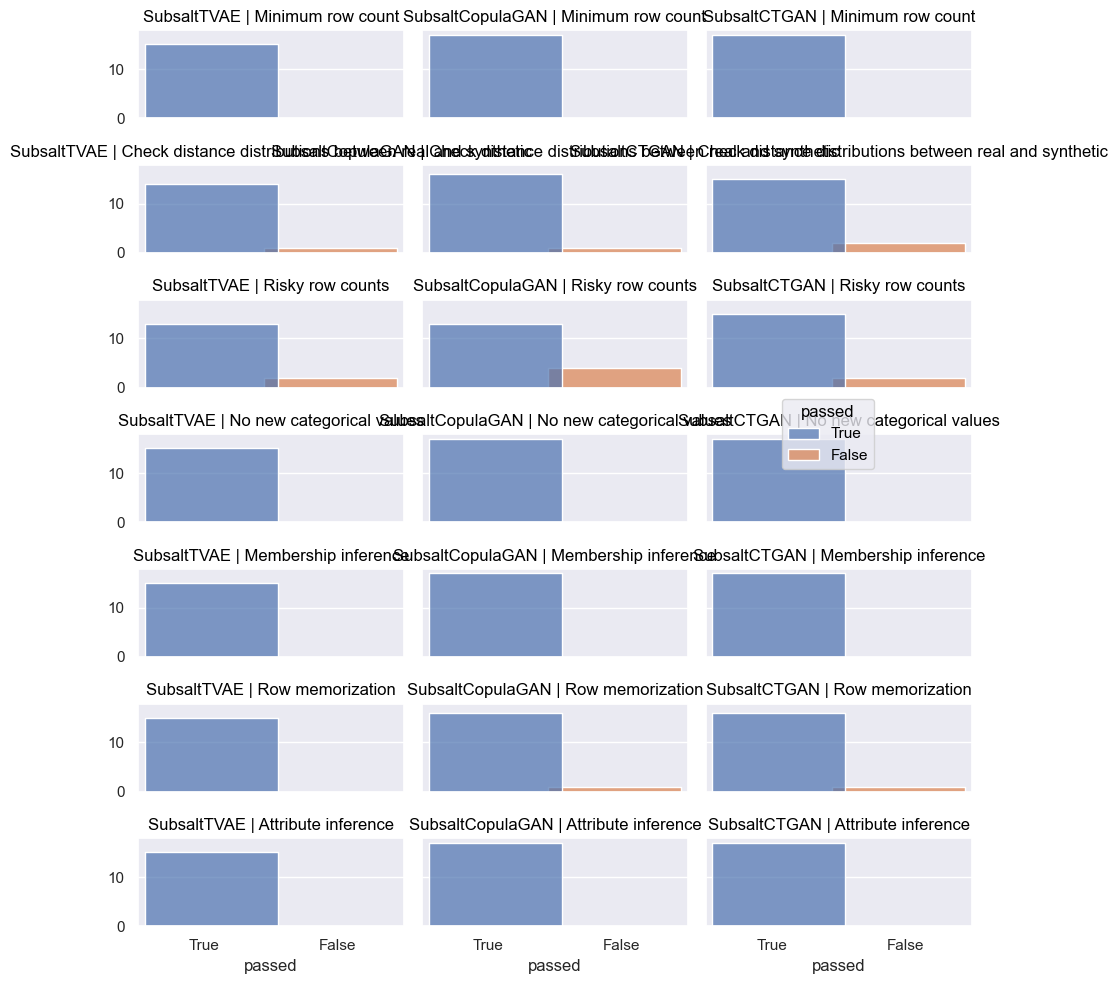

In [13]:
import seaborn.objects as so

plot = (
    so.Plot(df, x="passed", color="passed")
    .facet(col="type", row="name")
    .add(so.Bars(), so.Hist())
    .layout(size=(9, 10))
)
plot.show()

* Based on the sample data showed above, the privacy tests fail more likely are `Risky row counts`, `Check distance distributions between real and synthetic`, `Row memorization`.

In [14]:
df_failed = df[df["passed"] == False]
df_failed

,type,epochs,learning_rate,batch_size,runtime_end,row_count,name,passed,schema_id
45,SubsaltTVAE,3000,0.0002,50000,2024-10-21T00:15:48.070040,25000,Risky row counts,False,1
50,SubsaltCTGAN,3000,0.0002,50000,2024-10-21T00:15:49.070495,25000,Risky row counts,False,1
59,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T00:15:49.910286,25000,Risky row counts,False,1
234,SubsaltTVAE,3000,0.0002,50000,2024-10-21T18:20:34.620137,6000,Risky row counts,False,0
241,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T18:20:35.275274,6000,Risky row counts,False,0
248,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T18:20:35.966783,6000,Risky row counts,False,0
256,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T18:42:19.341277,6000,Risky row counts,False,0
257,SubsaltCopulaGAN,3000,0.0002,50000,2024-10-21T18:42:19.341277,6000,Row memorization,False,0
263,SubsaltCTGAN,3000,0.0002,50000,2024-10-21T18:42:20.083042,6000,Risky row counts,False,0
264,SubsaltCTGAN,3000,0.0002,50000,2024-10-21T18:42:20.083042,6000,Row memorization,False,0


In [15]:
for schema_id in df_failed["schema_id"].unique():
    for name in df_failed[df_failed["schema_id"] == schema_id]["name"].unique():
        for type in df_failed[df_failed["schema_id"] == schema_id]["type"].unique():
            print(f"dataset: #{schema_id}, Privacy test: {name}, Type: {type}")
            print(
                df[
                    (df["schema_id"] == schema_id)
                    & (df["name"] == name)
                    & (df["type"] == type)
                ][["type", "epochs", "row_count", "passed", "runtime_end"]]
            )

dataset: #1, Privacy test: Risky row counts, Type: SubsaltTVAE
           type epochs  row_count  passed                 runtime_end
45  SubsaltTVAE   3000      25000   False  2024-10-21T00:15:48.070040
64  SubsaltTVAE   3000      25000    True  2024-10-21T00:38:13.921497
85  SubsaltTVAE   3000      25000    True  2024-10-21T00:38:16.282874
dataset: #1, Privacy test: Risky row counts, Type: SubsaltCTGAN
            type epochs  row_count  passed                 runtime_end
50  SubsaltCTGAN   3000      25000   False  2024-10-21T00:15:49.070495
71  SubsaltCTGAN   3000      25000    True  2024-10-21T00:38:14.530730
92  SubsaltCTGAN   3000      25000    True  2024-10-21T00:38:16.565928
dataset: #1, Privacy test: Risky row counts, Type: SubsaltCopulaGAN
                type epochs  row_count  passed                 runtime_end
59  SubsaltCopulaGAN   3000      25000   False  2024-10-21T00:15:49.910286
78  SubsaltCopulaGAN   3000      25000    True  2024-10-21T00:38:15.526202
99  SubsaltCopul

* It is observed that for some of the datasets, the same privacy test can fail and pass with the same model and hyperparameters. We will need more feature data that can differentiate them.